In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns
import warnings 

In [2]:
warnings.filterwarnings('ignore')

In [3]:
df=pd.read_csv('/content/Telco_Customer_Churn.csv')

##First look

In [4]:
df.head()


,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [6]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
SeniorCitizen,7043.0,0.162147,0.368612,0.00,0.0,0.00,0.00,1.00
tenure,7043.0,32.371149,24.559481,0.00,9.0,29.00,55.00,72.00
MonthlyCharges,7043.0,64.761692,30.090047,18.25,35.5,70.35,89.85,118.75


##Data manipulation and cleening

In [7]:
df.columns

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

In [8]:
df['gender'].unique()

array(['Female', 'Male'], dtype=object)

In [9]:
df['gender']=df['gender'].astype('category')

In [10]:
df['SeniorCitizen'].unique()

array([0, 1])

In [11]:
df['SeniorCitizen']=df['SeniorCitizen'].astype('category')

In [12]:
df['Partner'].unique()

array(['Yes', 'No'], dtype=object)

In [13]:
df['Partner']=df['Partner'].astype("category")

In [14]:
df['Dependents'].unique()

array(['No', 'Yes'], dtype=object)

In [15]:
df['Dependents']=df['Dependents'].astype("category")

In [16]:
df['tenure'].unique() 
#Number of months the customer has stayed with the company

array([ 1, 34,  2, 45,  8, 22, 10, 28, 62, 13, 16, 58, 49, 25, 69, 52, 71,
       21, 12, 30, 47, 72, 17, 27,  5, 46, 11, 70, 63, 43, 15, 60, 18, 66,
        9,  3, 31, 50, 64, 56,  7, 42, 35, 48, 29, 65, 38, 68, 32, 55, 37,
       36, 41,  6,  4, 33, 67, 23, 57, 61, 14, 20, 53, 40, 59, 24, 44, 19,
       54, 51, 26,  0, 39])

In [17]:
df['PhoneService'].unique()

array(['No', 'Yes'], dtype=object)

In [18]:
df['PhoneService']=df['PhoneService'].astype("category")

In [19]:
df['MultipleLines'].unique()

array(['No phone service', 'No', 'Yes'], dtype=object)

In [20]:
df['MultipleLines']=df['MultipleLines'].replace('No phone service','No')

In [21]:
df['MultipleLines'].unique()

array(['No', 'Yes'], dtype=object)

In [22]:
df['MultipleLines']=df['MultipleLines'].astype("category")

In [23]:
df['InternetService'].unique()

array(['DSL', 'Fiber optic', 'No'], dtype=object)

In [24]:
df['InternetService']=df['InternetService'].astype("category")

In [25]:
df['OnlineSecurity'].unique()

array(['No', 'Yes', 'No internet service'], dtype=object)

In [26]:
df['OnlineSecurity']=df['OnlineSecurity'].replace('No internet service','No')

In [27]:
df['OnlineSecurity']=df['OnlineSecurity'].astype("category")

In [28]:
df['OnlineBackup'].unique()

array(['Yes', 'No', 'No internet service'], dtype=object)

In [29]:
df['OnlineBackup']=df['OnlineBackup'].replace('No internet service','No')

In [30]:
df['OnlineBackup']=df['OnlineBackup'].astype("category")

In [31]:
df['DeviceProtection'].unique()

array(['No', 'Yes', 'No internet service'], dtype=object)

In [32]:
df['DeviceProtection']=df['DeviceProtection'].replace('No internet service','No')

In [33]:
df['DeviceProtection']=df['DeviceProtection'].astype("category")

In [34]:
df['TechSupport'].unique()

array(['No', 'Yes', 'No internet service'], dtype=object)

In [35]:
df['TechSupport']=df['TechSupport'].replace('No internet service','No')

In [36]:
df['TechSupport']=df['TechSupport'].astype("category")

In [37]:
df['StreamingTV'].unique()

array(['No', 'Yes', 'No internet service'], dtype=object)

In [38]:
df['StreamingTV']=df['StreamingTV'].replace('No internet service','No')

In [39]:
df['StreamingTV']=df['StreamingTV'].astype("category")

In [40]:
df['StreamingMovies'].unique()

array(['No', 'Yes', 'No internet service'], dtype=object)

In [41]:
df['StreamingMovies']=df['StreamingMovies'].replace('No internet service','No')

In [42]:
df['StreamingMovies']=df['StreamingMovies'].astype("category")

In [43]:
df['Contract'].unique()

array(['Month-to-month', 'One year', 'Two year'], dtype=object)

In [44]:
df['Contract']=df['Contract'].astype("category")

In [45]:
df['PaperlessBilling'].unique()

array(['Yes', 'No'], dtype=object)

In [46]:
df['PaperlessBilling']=df['PaperlessBilling'].astype("category")

In [47]:
df['PaymentMethod'].unique()

array(['Electronic check', 'Mailed check', 'Bank transfer (automatic)',
       'Credit card (automatic)'], dtype=object)

In [48]:
df['PaymentMethod']=df['PaymentMethod'].astype("category")

In [49]:
df['MonthlyCharges'].dtypes

dtype('float64')

In [50]:
df['Churn'].unique()

array(['No', 'Yes'], dtype=object)

In [51]:
df['Churn']=df['Churn'].astype("category")

In [52]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype   
---  ------            --------------  -----   
 0   customerID        7043 non-null   object  
 1   gender            7043 non-null   category
 2   SeniorCitizen     7043 non-null   category
 3   Partner           7043 non-null   category
 4   Dependents        7043 non-null   category
 5   tenure            7043 non-null   int64   
 6   PhoneService      7043 non-null   category
 7   MultipleLines     7043 non-null   category
 8   InternetService   7043 non-null   category
 9   OnlineSecurity    7043 non-null   category
 10  OnlineBackup      7043 non-null   category
 11  DeviceProtection  7043 non-null   category
 12  TechSupport       7043 non-null   category
 13  StreamingTV       7043 non-null   category
 14  StreamingMovies   7043 non-null   category
 15  Contract          7043 non-null   category
 16  PaperlessBilling  7043 n

In [53]:
df.isnull().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [54]:
df[df['TotalCharges']==' ']

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
488,4472-LVYGI,Female,0,Yes,Yes,0,No,No,DSL,Yes,...,Yes,Yes,Yes,No,Two year,Yes,Bank transfer (automatic),52.55,,No
753,3115-CZMZD,Male,0,No,Yes,0,Yes,No,No,No,...,No,No,No,No,Two year,No,Mailed check,20.25,,No
936,5709-LVOEQ,Female,0,Yes,Yes,0,Yes,No,DSL,Yes,...,Yes,No,Yes,Yes,Two year,No,Mailed check,80.85,,No
1082,4367-NUYAO,Male,0,Yes,Yes,0,Yes,Yes,No,No,...,No,No,No,No,Two year,No,Mailed check,25.75,,No
1340,1371-DWPAZ,Female,0,Yes,Yes,0,No,No,DSL,Yes,...,Yes,Yes,Yes,No,Two year,No,Credit card (automatic),56.05,,No
3331,7644-OMVMY,Male,0,Yes,Yes,0,Yes,No,No,No,...,No,No,No,No,Two year,No,Mailed check,19.85,,No
3826,3213-VVOLG,Male,0,Yes,Yes,0,Yes,Yes,No,No,...,No,No,No,No,Two year,No,Mailed check,25.35,,No
4380,2520-SGTTA,Female,0,Yes,Yes,0,Yes,No,No,No,...,No,No,No,No,Two year,No,Mailed check,20.00,,No
5218,2923-ARZLG,Male,0,Yes,Yes,0,Yes,No,No,No,...,No,No,No,No,One year,Yes,Mailed check,19.70,,No
6670,4075-WKNIU,Female,0,Yes,Yes,0,Yes,Yes,DSL,No,...,Yes,Yes,Yes,No,Two year,No,Mailed check,73.35,,No


In [55]:
df.loc[(df.customerID == '4472-LVYGI'),'TotalCharges']= ' '

In [56]:
df['TotalCharges']=df['TotalCharges'].replace(' ','0')

In [57]:
df[df['TotalCharges']==' ']


,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn


In [58]:
df['TotalCharges'] = df['TotalCharges'].astype('float')

In [59]:
df['TotalCharges'].value_counts(sort =True)

0.00       11
20.20      11
19.75       9
20.05       8
19.90       8
           ..
6849.40     1
692.35      1
130.15      1
3211.90     1
6844.50     1
Name: TotalCharges, Length: 6531, dtype: int64

In [60]:
df.sort_values('TotalCharges')

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
3826,3213-VVOLG,Male,0,Yes,Yes,0,Yes,Yes,No,No,...,No,No,No,No,Two year,No,Mailed check,25.35,0.00,No
5218,2923-ARZLG,Male,0,Yes,Yes,0,Yes,No,No,No,...,No,No,No,No,One year,Yes,Mailed check,19.70,0.00,No
4380,2520-SGTTA,Female,0,Yes,Yes,0,Yes,No,No,No,...,No,No,No,No,Two year,No,Mailed check,20.00,0.00,No
753,3115-CZMZD,Male,0,No,Yes,0,Yes,No,No,No,...,No,No,No,No,Two year,No,Mailed check,20.25,0.00,No
488,4472-LVYGI,Female,0,Yes,Yes,0,No,No,DSL,Yes,...,Yes,Yes,Yes,No,Two year,Yes,Bank transfer (automatic),52.55,0.00,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2187,8879-XUAHX,Male,0,Yes,No,71,Yes,Yes,Fiber optic,Yes,...,Yes,Yes,Yes,Yes,Two year,Yes,Electronic check,116.25,8564.75,No
5347,9788-HNGUT,Male,0,Yes,No,72,Yes,Yes,Fiber optic,Yes,...,Yes,Yes,Yes,Yes,Two year,Yes,Credit card (automatic),116.95,8594.40,No
6768,9739-JLPQJ,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,Yes,...,Yes,Yes,Yes,Yes,Two year,No,Credit card (automatic),117.50,8670.10,No
4586,7569-NMZYQ,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,Yes,...,Yes,Yes,Yes,Yes,Two year,Yes,Bank transfer (automatic),118.75,8672.45,No


In [61]:
df[df['TotalCharges']==8684.80]

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
4610,2889-FPWRM,Male,0,Yes,No,72,Yes,Yes,Fiber optic,Yes,...,Yes,Yes,Yes,Yes,One year,Yes,Bank transfer (automatic),117.8,8684.8,Yes


## Exploratory data analysis

In [62]:
df['Churn'].value_counts(normalize=True)

No     0.73463
Yes    0.26537
Name: Churn, dtype: float64

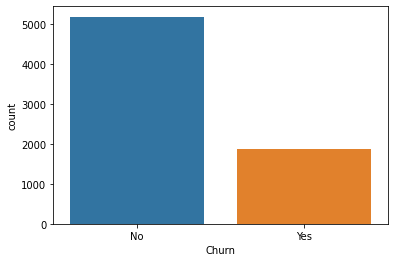

In [63]:
sns.countplot(x='Churn',data =df)

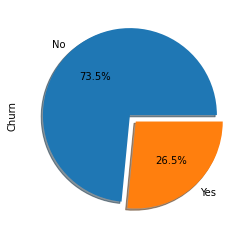

In [64]:
df['Churn'].value_counts(normalize=True).plot(kind='pie',shadow=True,autopct='%1.1f%%',explode=[0,0.1])

In [65]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype   
---  ------            --------------  -----   
 0   customerID        7043 non-null   object  
 1   gender            7043 non-null   category
 2   SeniorCitizen     7043 non-null   category
 3   Partner           7043 non-null   category
 4   Dependents        7043 non-null   category
 5   tenure            7043 non-null   int64   
 6   PhoneService      7043 non-null   category
 7   MultipleLines     7043 non-null   category
 8   InternetService   7043 non-null   category
 9   OnlineSecurity    7043 non-null   category
 10  OnlineBackup      7043 non-null   category
 11  DeviceProtection  7043 non-null   category
 12  TechSupport       7043 non-null   category
 13  StreamingTV       7043 non-null   category
 14  StreamingMovies   7043 non-null   category
 15  Contract          7043 non-null   category
 16  PaperlessBilling  7043 n

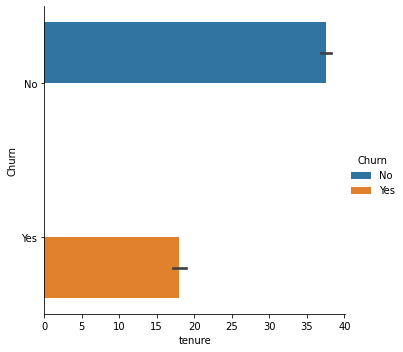

In [66]:
sns.catplot(x='tenure' ,y='Churn',data =df ,kind='bar',hue='Churn')

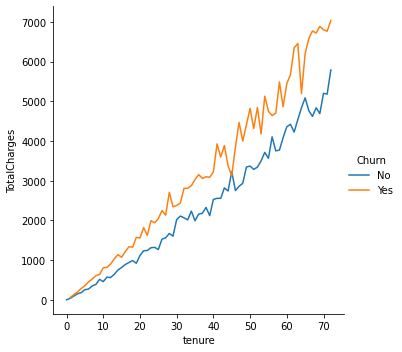

In [67]:
sns.relplot(x='tenure' ,y='TotalCharges',data =df ,kind='line',hue='Churn',ci=None)

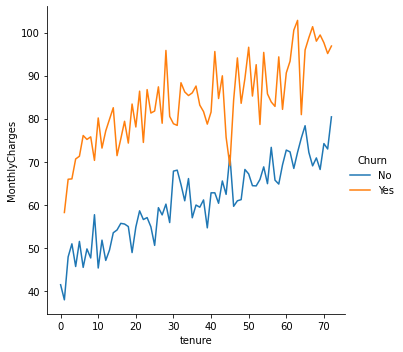

In [68]:
sns.relplot(x='tenure' ,y='MonthlyCharges',data =df ,kind='line',hue='Churn',ci=None)

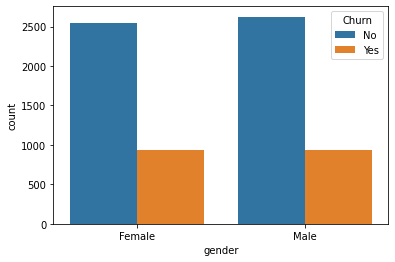

In [69]:
sns.countplot(x='gender',data =df,hue='Churn')

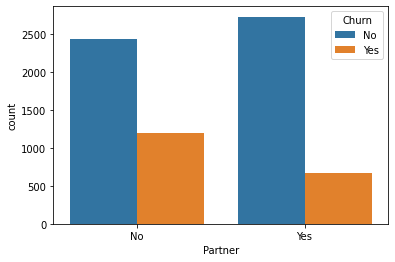

In [70]:
sns.countplot(x='Partner',data =df,hue='Churn')

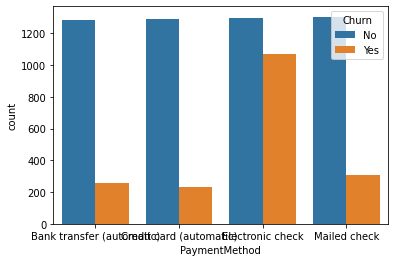

In [71]:
sns.countplot(x='PaymentMethod',data =df,hue='Churn')

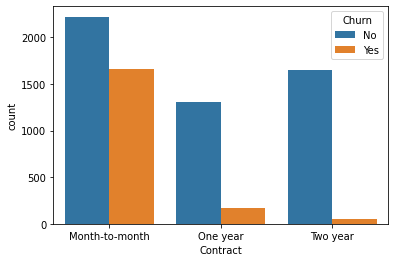

In [72]:
sns.countplot(x='Contract',data =df,hue='Churn')

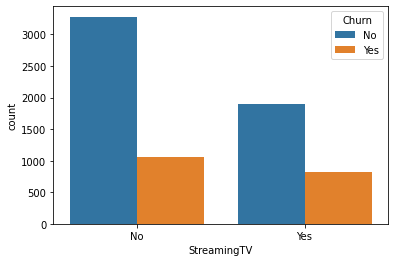

In [73]:
sns.countplot(x='StreamingTV',data =df,hue='Churn')

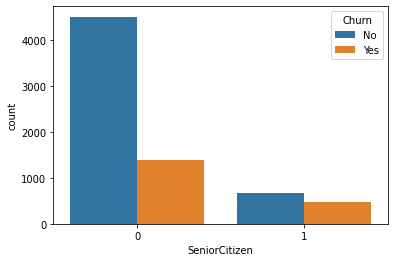

In [74]:
sns.countplot(x='SeniorCitizen',data =df,hue='Churn')

In [75]:
(df
.groupby(['SeniorCitizen'])['Churn']
.value_counts(normalize=True)
.mul(100)
.rename('percent')
)


SeniorCitizen     
0              No     76.393832
               Yes    23.606168
1              No     58.318739
               Yes    41.681261
Name: percent, dtype: float64

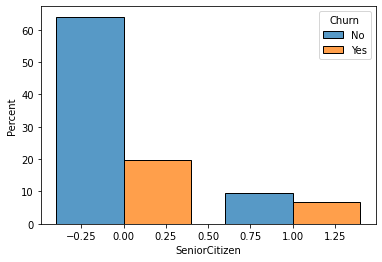

In [76]:
sns.histplot(x = df['SeniorCitizen'], hue=df['Churn'], multiple="dodge", 
                   stat="percent", shrink = 0.8)

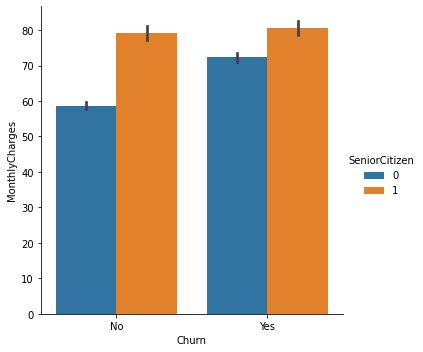

In [77]:
sns.catplot(x='Churn',y='MonthlyCharges',data=df,hue='SeniorCitizen',kind='bar')

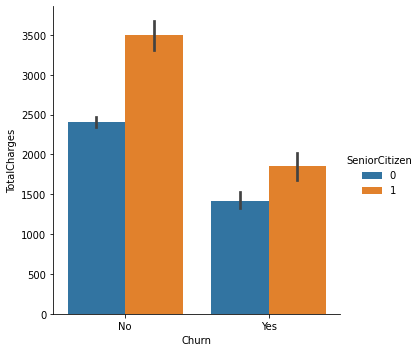

In [78]:
sns.catplot(x='Churn',y='TotalCharges',data=df,hue='SeniorCitizen',kind='bar')

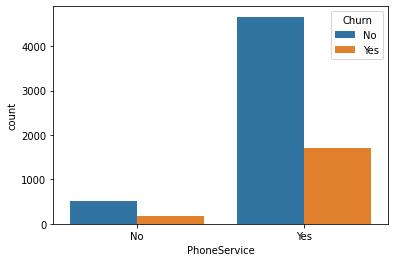

In [79]:
sns.countplot(x='PhoneService',data =df,hue='Churn')

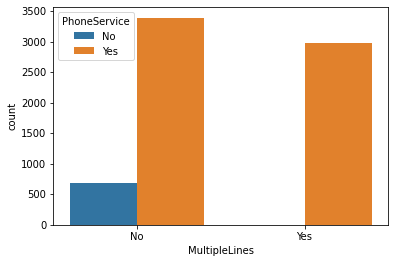

In [81]:
sns.countplot(x='MultipleLines',data =df,hue='PhoneService')

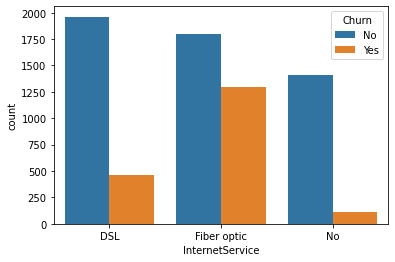

In [82]:
sns.countplot(x='InternetService',data =df,hue='Churn')

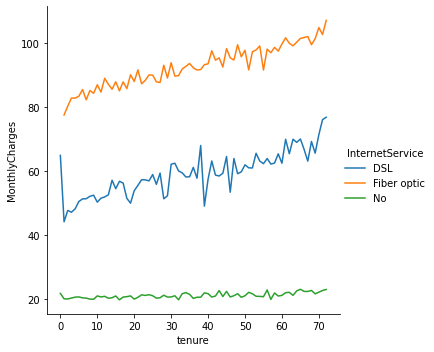

In [83]:
sns.relplot(x='tenure',y='MonthlyCharges' ,hue='InternetService',data=df,kind='line',ci=None)

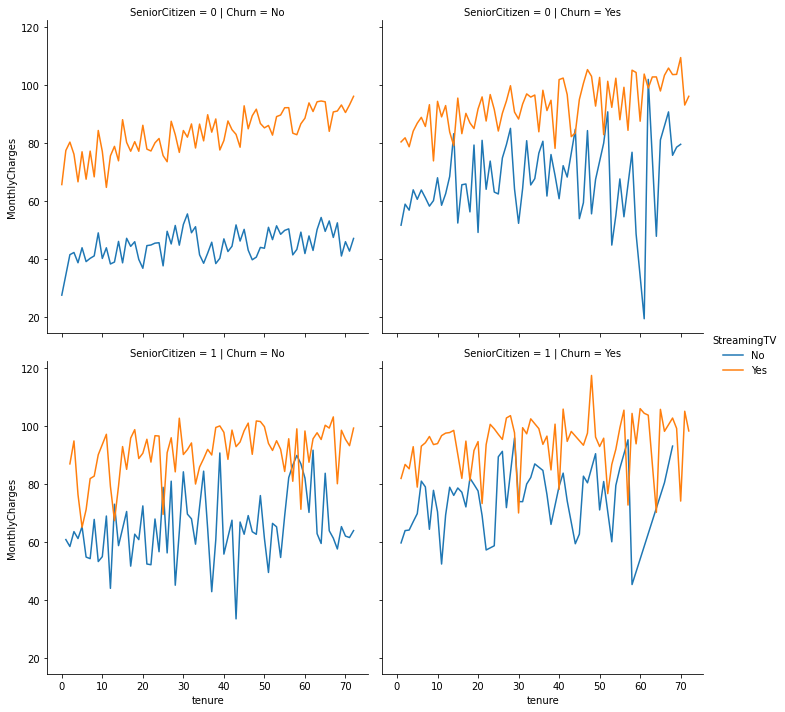

In [84]:
sns.relplot(x='tenure',y='MonthlyCharges' ,hue='StreamingTV',col='Churn',row='SeniorCitizen',data=df,kind='line',ci=None)

In [85]:
df.columns

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

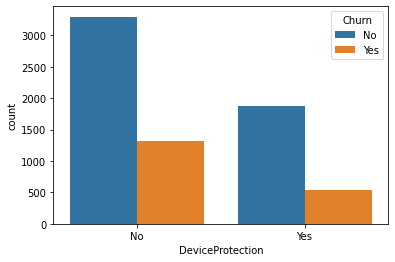

In [86]:
sns.countplot(x='DeviceProtection',data =df,hue='Churn')

In [87]:
df1=df

In [88]:
df1.loc[df1['DeviceProtection']=='No internet service','DeviceProtection']='No'

In [89]:
df1['DeviceProtection'].unique()

['No', 'Yes']
Categories (2, object): ['No', 'Yes']

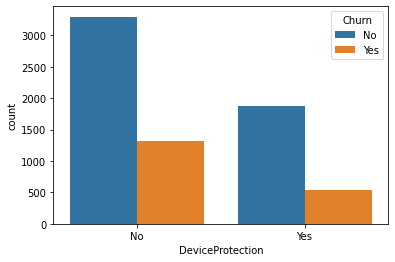

In [90]:
sns.countplot(x='DeviceProtection',data =df1,hue='Churn')

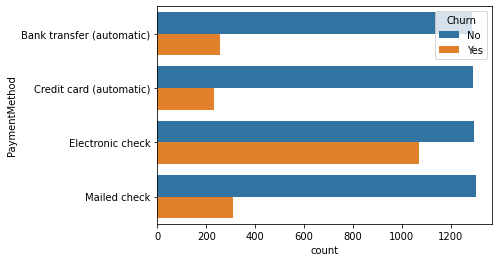

In [91]:
sns.countplot(y='PaymentMethod',data =df,hue='Churn')


## Feature Selection


In [92]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype   
---  ------            --------------  -----   
 0   customerID        7043 non-null   object  
 1   gender            7043 non-null   category
 2   SeniorCitizen     7043 non-null   category
 3   Partner           7043 non-null   category
 4   Dependents        7043 non-null   category
 5   tenure            7043 non-null   int64   
 6   PhoneService      7043 non-null   category
 7   MultipleLines     7043 non-null   category
 8   InternetService   7043 non-null   category
 9   OnlineSecurity    7043 non-null   category
 10  OnlineBackup      7043 non-null   category
 11  DeviceProtection  7043 non-null   category
 12  TechSupport       7043 non-null   category
 13  StreamingTV       7043 non-null   category
 14  StreamingMovies   7043 non-null   category
 15  Contract          7043 non-null   category
 16  PaperlessBilling  7043 n

In [93]:
df1=df.drop(['customerID','Churn'], axis=1)

In [94]:
df_dummies = pd.get_dummies(df1,drop_first=True)

In [95]:
y=df.loc[:,'Churn']

In [96]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
y = le.fit_transform(y)
print(y)

[0 0 1 ... 0 1 0]


In [97]:
df_dummies['Churn']=y

In [98]:
df_dummies.shape

(7043, 24)

In [99]:
df_dummies.columns

Index(['tenure', 'MonthlyCharges', 'TotalCharges', 'gender_Male',
       'SeniorCitizen_1', 'Partner_Yes', 'Dependents_Yes', 'PhoneService_Yes',
       'MultipleLines_Yes', 'InternetService_Fiber optic',
       'InternetService_No', 'OnlineSecurity_Yes', 'OnlineBackup_Yes',
       'DeviceProtection_Yes', 'TechSupport_Yes', 'StreamingTV_Yes',
       'StreamingMovies_Yes', 'Contract_One year', 'Contract_Two year',
       'PaperlessBilling_Yes', 'PaymentMethod_Credit card (automatic)',
       'PaymentMethod_Electronic check', 'PaymentMethod_Mailed check',
       'Churn'],
      dtype='object')

In [100]:
df_dummies.head()

,tenure,MonthlyCharges,TotalCharges,gender_Male,SeniorCitizen_1,Partner_Yes,Dependents_Yes,PhoneService_Yes,MultipleLines_Yes,InternetService_Fiber optic,...,TechSupport_Yes,StreamingTV_Yes,StreamingMovies_Yes,Contract_One year,Contract_Two year,PaperlessBilling_Yes,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,Churn
0,1,29.85,29.85,0,0,1,0,0,0,0,...,0,0,0,0,0,1,0,1,0,0
1,34,56.95,1889.50,1,0,0,0,1,0,0,...,0,0,0,1,0,0,0,0,1,0
2,2,53.85,108.15,1,0,0,0,1,0,0,...,0,0,0,0,0,1,0,0,1,1
3,45,42.30,1840.75,1,0,0,0,0,0,0,...,1,0,0,1,0,0,0,0,0,0
4,2,70.70,151.65,0,0,0,0,1,0,1,...,0,0,0,0,0,1,0,1,0,1


In [101]:
X=df_dummies.drop(['Churn'], axis=1)
y=df_dummies['Churn']

In [102]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2, f_classif, mutual_info_classif

In [103]:
from sklearn.neighbors import KNeighborsClassifier


In [104]:
from sklearn.model_selection import train_test_split

In [105]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

In [106]:
from sklearn.preprocessing import StandardScaler

In [107]:
sd=StandardScaler()

In [108]:
X_train.loc[:,['tenure','MonthlyCharges','TotalCharges']] =sd.fit_transform(X_train.loc[:,['tenure','MonthlyCharges','TotalCharges']])
X_test.loc[:,['tenure','MonthlyCharges','TotalCharges']] =sd.transform(X_test.loc[:,['tenure','MonthlyCharges','TotalCharges']])

In [109]:
neighbors = np.arange(1, 13)
train_accuracies = {}
test_accuracies = {}

for neighbor in neighbors:
	knn = KNeighborsClassifier(n_neighbors=neighbor)
	knn.fit(X_train, y_train)
	train_accuracies[neighbor] = knn.score(X_train, y_train)
	test_accuracies[neighbor] = knn.score(X_test, y_test)
print(neighbors, '\n', train_accuracies, '\n', test_accuracies)

[ 1  2  3  4  5  6  7  8  9 10 11 12] 
 {1: 0.9980475683351083, 2: 0.8681221157259496, 3: 0.8588924387646433, 4: 0.8383031593894213, 5: 0.8343982960596379, 6: 0.8299609513667021, 7: 0.8274760383386581, 8: 0.8260560880369187, 9: 0.8264110756123536, 10: 0.8249911253106141, 11: 0.8223287184948527, 12: 0.8209087681931132} 
 {1: 0.7381121362668559, 2: 0.7629524485450674, 3: 0.7615330021291696, 4: 0.7750177430801988, 5: 0.7629524485450674, 6: 0.7785663591199432, 7: 0.7707594038325053, 8: 0.7814052519517388, 9: 0.7721788502484032, 10: 0.7814052519517388, 11: 0.7764371894960965, 12: 0.7792760823278921}


In [110]:
knn = KNeighborsClassifier(n_neighbors=10)
knn.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=10)

In [111]:
k = np.arange(5, 24)
for k in k:
  selector = SelectKBest(score_func=chi2, k=k)
  selector.fit(X, y)
  selected_features = selector.transform(X)


In [112]:
selector = SelectKBest(score_func=chi2, k=10)
selector.fit(X, y)
selected_features = selector.transform(X)
selected_indices = selector.get_support(indices=True)

In [113]:
selected_features.shape

(7043, 10)

In [114]:
selected_indices


array([ 0,  1,  2,  9, 10, 11, 14, 17, 18, 21])

In [115]:
XFS=X.iloc[:,[0,1,2,10,9,11,14,17,18,21]]

In [116]:
knn = KNeighborsClassifier(n_neighbors=10)
knn.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=10)

In [117]:
XFS.columns

Index(['tenure', 'MonthlyCharges', 'TotalCharges', 'InternetService_No',
       'InternetService_Fiber optic', 'OnlineSecurity_Yes', 'TechSupport_Yes',
       'Contract_One year', 'Contract_Two year',
       'PaymentMethod_Electronic check'],
      dtype='object')

In [118]:
selector.get_feature_names_out()

array(['tenure', 'MonthlyCharges', 'TotalCharges',
       'InternetService_Fiber optic', 'InternetService_No',
       'OnlineSecurity_Yes', 'TechSupport_Yes', 'Contract_One year',
       'Contract_Two year', 'PaymentMethod_Electronic check'],
      dtype=object)

In [119]:
from sklearn.pipeline import Pipeline

In [120]:
from sklearn.linear_model import LogisticRegression

In [121]:
log=LogisticRegression()
log.fit(X_train,y_train)

LogisticRegression()

In [122]:
s=np.arange(5,24)
for i in s :
  X_new = SelectKBest(chi2, k=i ).fit_transform(X, y)
  X_train, X_test, y_train, y_test = train_test_split(X_new, y, test_size=0.2, random_state=42, stratify=y)
  kn=KNeighborsClassifier(n_neighbors=10)
  kn.fit(X_train,y_train)
  print( i,":",kn.score(X_test, y_test) , kn.score(X_train, y_train))

5 : 0.794889992902768 0.8107916222932198
6 : 0.794889992902768 0.8107916222932198
7 : 0.794180269694819 0.811324103656372
8 : 0.794180269694819 0.8111466098686546
9 : 0.7955997161107168 0.811324103656372
10 : 0.7970191625266146 0.8115015974440895
11 : 0.7998580553584103 0.8120340788072418
12 : 0.7970191625266146 0.8129215477458289
13 : 0.7984386089425124 0.8129215477458289
14 : 0.7984386089425124 0.8129215477458289
15 : 0.7977288857345636 0.8125665601703941
16 : 0.7963094393186657 0.8120340788072418
17 : 0.7955997161107168 0.8116790912318069
18 : 0.7970191625266146 0.8120340788072418
19 : 0.7955997161107168 0.8116790912318069
20 : 0.7955997161107168 0.8116790912318069
21 : 0.794889992902768 0.8118565850195243
22 : 0.7934705464868701 0.8118565850195243
23 : 0.7934705464868701 0.8116790912318069


In [123]:
s=np.arange(5,24)
for i in s :
  X_new = SelectKBest(chi2, k=i ).fit_transform(X, y)
  X_train, X_test, y_train, y_test = train_test_split(X_new, y, test_size=0.2, random_state=42, stratify=y)
  log=LogisticRegression()
  log.fit(X_train,y_train)
  print( i,":",log.score(X_test, y_test) , log.score(X_train, y_train))

5 : 0.7714691270404542 0.7809726659566916
6 : 0.7877927608232789 0.7939297124600639
7 : 0.7899219304471257 0.7962371317003905
8 : 0.7877927608232789 0.7958821441249556
9 : 0.7934705464868701 0.7996095136670217
10 : 0.7863733144073811 0.7981895633652822
11 : 0.7934705464868701 0.7976570820021299
12 : 0.7955997161107168 0.7978345757898474
13 : 0.7998580553584103 0.8020944266950657
14 : 0.8005677785663591 0.8008519701810437
15 : 0.7991483321504613 0.8017394391196309
16 : 0.7977288857345636 0.8022719204827831
17 : 0.7970191625266146 0.802626908058218
18 : 0.7963094393186657 0.802626908058218
19 : 0.7984386089425124 0.8028044018459354
20 : 0.794889992902768 0.8059992900248492
21 : 0.8019872249822569 0.7980120695775648
22 : 0.7977288857345636 0.8054668086616968
23 : 0.801277501774308 0.8052893148739794


In [124]:
from sklearn.tree import DecisionTreeClassifier

In [125]:
s=np.arange(5,24)
for i in s :
  X_new = SelectKBest(chi2, k=i ).fit_transform(X, y)
  X_train, X_test, y_train, y_test = train_test_split(X_new, y, test_size=0.2, random_state=42, stratify=y)
  dt=DecisionTreeClassifier(random_state=0)
  dt.fit(X_train,y_train)
  print( i,":",dt.score(X_test, y_test) , dt.score(X_train, y_train))

5 : 0.716820440028389 0.9913028044018459
6 : 0.7253371185237757 0.9914802981895634
7 : 0.7288857345635202 0.9914802981895634
8 : 0.7324343506032647 0.9914802981895634
9 : 0.7395315826827538 0.9920127795527156
10 : 0.7409510290986515 0.9923677671281506
11 : 0.7352732434350603 0.9934327298544551
12 : 0.723207948899929 0.9948526801561945
13 : 0.7175301632363378 0.9966276180333689
14 : 0.7210787792760823 0.9968051118210862
15 : 0.723207948899929 0.9971600993965212
16 : 0.7253371185237757 0.9976925807596734
17 : 0.7246273953158269 0.9976925807596734
18 : 0.7345635202271115 0.9976925807596734
19 : 0.7324343506032647 0.9976925807596734
20 : 0.7281760113555713 0.9976925807596734
21 : 0.7388218594748048 0.9976925807596734
22 : 0.7317246273953159 0.9980475683351083
23 : 0.7310149041873669 0.9980475683351083


In [126]:
from sklearn.metrics import classification_report,confusion_matrix
from sklearn.ensemble import RandomForestClassifier
rf=RandomForestClassifier()
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)
rf.fit(X_train,y_train)
y_pred=rf.predict(X_test)
cm= confusion_matrix(y_test,y_pred)
print(classification_report(y_test, y_pred))
print(cm)
print(rf.score(X_test, y_test) , rf.score(X_train, y_train))

              precision    recall  f1-score   support

           0       0.83      0.90      0.86      1035
           1       0.62      0.48      0.54       374

    accuracy                           0.78      1409
   macro avg       0.72      0.69      0.70      1409
weighted avg       0.77      0.78      0.78      1409

[[927 108]
 [195 179]]
0.7849538679914834 0.9980475683351083


In [127]:
#فالس نيجاتيف معناها انه هو1 وتوقعه 0 
#افالس نيجاتيف انه ترك و وتوقعه ما ترك
#فالس بوسيتيف انه هو 0 و توقعه 1 
#فالس بوسيتيف انه هو ما ترك و توقعه ترك 

In [128]:
##imbalance
##roc curve 

## OverSampling 

In [129]:
def plot_sampling(X, y, X_res, y_res, ax, fig = None, sampler = None, title=None):
    if fig:
        ax[0].scatter(X.iloc[:, 0], X.iloc[:, 1], c=y, alpha=0.8, edgecolor="k")
        ax[1].scatter(X_res[:, 0], X_res[:, 1], c=y_res, alpha=0.8, edgecolor="k")
        sns.despine(fig)
        ax[0].set_title(f"Before sampling")
        if sampler:
            ax[1].set_title(f"Resampling with {sampler.__class__.__name__}")
        else:
            ax[1].set_title("After sampling")
    else:
        print('pass the `fig` parameter')


In [130]:
from sklearn.metrics import plot_confusion_matrix

def confusion_matrix(sampler, X_test, y_test, ax):
    plot_confusion_matrix(sampler, X_test, y_test, ax=ax, values_format='d')
    ax.set_title(sampler.__class__.__name__)

In [131]:
from imblearn.over_sampling import SMOTE, ADASYN

In [132]:
from sklearn.model_selection import cross_val_score

In [133]:
X_train, X_test, y_train, y_test = train_test_split(X_new, y, test_size=0.2, random_state=42, stratify=y)

In [134]:
X_oversample, y_oversample = SMOTE().fit_resample(X_train, y_train)

In [135]:
X_oversample.shape

(8278, 23)

In [136]:
oversample_classifiers = {
    'LogisticRegression': LogisticRegression(solver='sag'),
    'KNearest': KNeighborsClassifier(),
    'RandomForestClassifier': RandomForestClassifier()
}

In [137]:
for key, cls in oversample_classifiers.items():
    training_score = cross_val_score(cls, X_oversample, y_oversample, cv=5)
    cls.fit(X_oversample, y_oversample)
    print("Classifier: ", cls.__class__.__name__,
          "has a training score of", round(training_score.mean(), 2) * 100,
          "% accuracy score")

Classifier:  LogisticRegression has a training score of 72.0 % accuracy score
Classifier:  KNeighborsClassifier has a training score of 77.0 % accuracy score
Classifier:  RandomForestClassifier has a training score of 84.0 % accuracy score


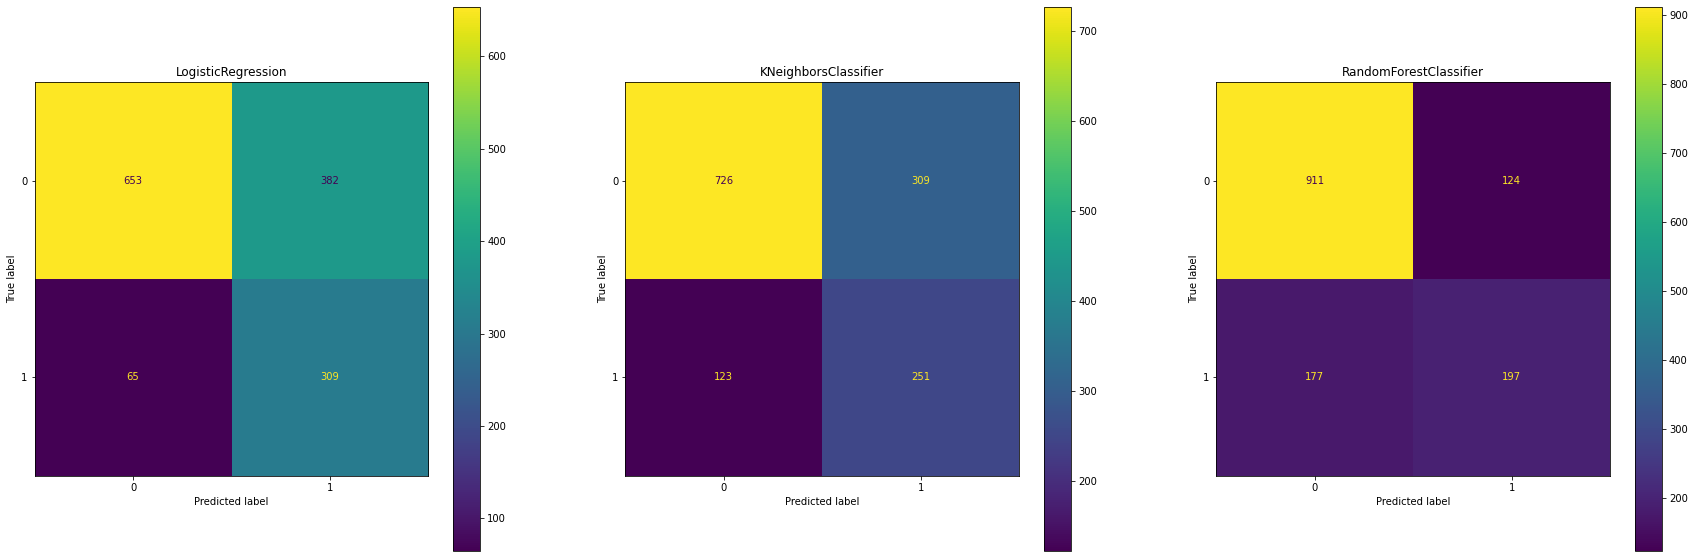

In [138]:
fig, ax = plt.subplots(1, len(oversample_classifiers),figsize=(30, 10))
for i, (key, cls) in enumerate(oversample_classifiers.items()):
    training_score = confusion_matrix(cls, X_test, y_test, ax=ax[i])

In [139]:
from sklearn.metrics import classification_report,confusion_matrix
from sklearn.ensemble import RandomForestClassifier
rf=RandomForestClassifier(random_state=42)
rf.fit(X_oversample,y_oversample)
y_pred1=rf.predict(X_test)
cm= confusion_matrix(y_test,y_pred1)
print(classification_report(y_test, y_pred1))
print(cm)
print(rf.score(X_test, y_test) , rf.score(X_oversample, y_oversample))

              precision    recall  f1-score   support

           0       0.83      0.88      0.86      1035
           1       0.61      0.51      0.56       374

    accuracy                           0.78      1409
   macro avg       0.72      0.70      0.71      1409
weighted avg       0.77      0.78      0.78      1409

[[913 122]
 [183 191]]
0.7835344215755855 0.998550374486591


In [140]:
lig=LogisticRegression(random_state=42)
lig.fit(X_oversample,y_oversample)
print(classification_report(y_test, y_pred))
print(cm)
print(lig.score(X_test, y_test) , lig.score(X_oversample, y_oversample))

              precision    recall  f1-score   support

           0       0.83      0.90      0.86      1035
           1       0.62      0.48      0.54       374

    accuracy                           0.78      1409
   macro avg       0.72      0.69      0.70      1409
weighted avg       0.77      0.78      0.78      1409

[[913 122]
 [183 191]]
0.7402413058907026 0.7760328581783039


##Hyperparameter tuning

In [141]:
from sklearn.model_selection import RandomizedSearchCV

In [142]:
param_grid={"n_estimators":np.arange(50,200,50),"max_depth":np.arange(2,15,1),"min_samples_leaf":[1, 2, 4],"min_samples_split" : [2, 5, 10]}

In [143]:
rf1=RandomForestClassifier(random_state=42)
rf1_cv = RandomizedSearchCV(rf1,param_grid,cv=10)
rf1_cv.fit(X_oversample,y_oversample)
print(rf1_cv.best_params_,rf1_cv.best_score_)

{'n_estimators': 150, 'min_samples_split': 2, 'min_samples_leaf': 4, 'max_depth': 14} 0.855171915251564


In [144]:
rf2=RandomForestClassifier(n_estimators=100,min_samples_split=10,min_samples_leaf=2,max_depth=13,random_state=42)
rf2.fit(X_oversample,y_oversample)
y_pred3=rf2.predict(X_test)
print(classification_report(y_test, y_pred3))
print(rf2.score(X_test, y_test) , rf2.score(X_oversample, y_oversample))

              precision    recall  f1-score   support

           0       0.86      0.86      0.86      1035
           1       0.61      0.60      0.60       374

    accuracy                           0.79      1409
   macro avg       0.73      0.73      0.73      1409
weighted avg       0.79      0.79      0.79      1409

0.7920511000709723 0.9077071756462913


In [145]:
rf=RandomForestClassifier(random_state=42)
rf_cv = RandomizedSearchCV(rf1,param_grid,cv=10)
rf_cv.fit(X_train,y_train)
print(rf_cv.best_params_,rf_cv.best_score_)

{'n_estimators': 50, 'min_samples_split': 10, 'min_samples_leaf': 4, 'max_depth': 9} 0.8015544889963847


In [146]:
rf3=RandomForestClassifier(n_estimators=50,min_samples_split=2,min_samples_leaf=4,max_depth=9,random_state=42)
rf3.fit(X_train,y_train)
y_pred4=rf2.predict(X_test)
print(classification_report(y_test, y_pred4))
print(rf3.score(X_test, y_test) , rf3.score(X_train, y_train))

              precision    recall  f1-score   support

           0       0.86      0.86      0.86      1035
           1       0.61      0.60      0.60       374

    accuracy                           0.79      1409
   macro avg       0.73      0.73      0.73      1409
weighted avg       0.79      0.79      0.79      1409

0.8026969481902059 0.836528221512247


##UnderSampling

In [147]:
from imblearn.under_sampling import NearMiss

In [148]:
nm2 = NearMiss(version=2)
X_undersample, y_undersample = nm2.fit_resample(X_train, y_train)

In [149]:
X_undersample.shape

(2990, 23)

In [150]:
rf_un=RandomForestClassifier(random_state=42)
rf_un.fit(X_undersample, y_undersample)
y_pred5=rf_un.predict(X_test)
print(classification_report(y_test, y_pred5))
print(rf_un.score(X_test, y_test) , rf_un.score(X_undersample, y_undersample))

              precision    recall  f1-score   support

           0       0.85      0.34      0.48      1035
           1       0.31      0.83      0.45       374

    accuracy                           0.47      1409
   macro avg       0.58      0.58      0.47      1409
weighted avg       0.71      0.47      0.47      1409

0.46770759403832507 1.0


In [151]:
rf_un_cv = RandomizedSearchCV(rf_un,param_grid,cv=10)
rf_un_cv.fit(X_undersample, y_undersample)
print(rf_cv.best_params_,rf_cv.best_score_)

{'n_estimators': 50, 'min_samples_split': 10, 'min_samples_leaf': 4, 'max_depth': 9} 0.8015544889963847


In [152]:
rf_un_2=RandomForestClassifier(n_estimators=50,min_samples_split=2,min_samples_leaf=4,max_depth=9,random_state=42)
rf_un_2.fit(X_undersample, y_undersample)
y_pred6=rf_un_2.predict(X_test)
print(classification_report(y_test, y_pred6))
print(rf_un_2.score(X_test, y_test) , rf_un_2.score(X_undersample, y_undersample))

              precision    recall  f1-score   support

           0       0.84      0.35      0.50      1035
           1       0.31      0.82      0.45       374

    accuracy                           0.48      1409
   macro avg       0.58      0.59      0.48      1409
weighted avg       0.70      0.48      0.49      1409

0.47693399574166073 0.9053511705685618


##OverSampling FeatureSelection Model Tuning

In [153]:
from imblearn.over_sampling import SMOTE, ADASYN

In [154]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

In [155]:
X_oversample, y_oversample = SMOTE().fit_resample(X_train, y_train)

In [156]:
X_oversample.shape

(8278, 23)

In [204]:
y_oversample.shape

(8278,)

In [158]:
X_new= SelectKBest(chi2, k=14 ).fit_transform(X_oversample, y_oversample )

In [159]:
X_new.shape

(8278, 14)

In [160]:
X_train1, X_test1, y_train1, y_test1 = train_test_split(X_new, y_oversample, test_size=0.2, random_state=42, stratify=y_oversample)

In [161]:
oversample_classifiers = {
    'LogisticRegression': LogisticRegression(solver='sag'),
    'KNearest': KNeighborsClassifier(),
    'RandomForestClassifier': RandomForestClassifier()
}

In [162]:
for key, cls in oversample_classifiers.items():
    training_score = cross_val_score(cls, X_oversample, y_oversample, cv=5)
    cls.fit(X_oversample, y_oversample)
    print("Classifier: ", cls.__class__.__name__,
          "has a training score of", round(training_score.mean(), 2) * 100,
          "% accuracy score")

Classifier:  LogisticRegression has a training score of 72.0 % accuracy score
Classifier:  KNeighborsClassifier has a training score of 78.0 % accuracy score
Classifier:  RandomForestClassifier has a training score of 84.0 % accuracy score


In [163]:
from sklearn.metrics import classification_report,confusion_matrix
from sklearn.ensemble import RandomForestClassifier
rf=RandomForestClassifier(random_state=42)
rf.fit(X_train1,y_train1)
y_pred1=rf.predict(X_test1)
print(classification_report(y_test1, y_pred1))
print(rf.score(X_test1, y_test1) , rf.score(X_train1, y_train1))

              precision    recall  f1-score   support

           0       0.83      0.84      0.83       828
           1       0.84      0.83      0.83       828

    accuracy                           0.83      1656
   macro avg       0.83      0.83      0.83      1656
weighted avg       0.83      0.83      0.83      1656

0.8321256038647343 0.9965267290848686


In [164]:
from sklearn.model_selection import RandomizedSearchCV

In [165]:
param_grid={"n_estimators":np.arange(50,200,50),"max_depth":np.arange(2,15,1),"min_samples_leaf":[1, 2, 4],"min_samples_split" : [2, 5, 10]}

In [166]:
rf_hy=RandomForestClassifier(random_state=42)
rf_hy = RandomizedSearchCV(rf,param_grid,cv=10)
rf_hy.fit(X_train1,y_train1)
print(rf_hy.best_params_,rf_hy.best_score_)

{'n_estimators': 150, 'min_samples_split': 5, 'min_samples_leaf': 1, 'max_depth': 13} 0.8372120681877213


In [167]:
rf_f=RandomForestClassifier(n_estimators=150,min_samples_split=10,min_samples_leaf=1,max_depth=11,random_state=42)
rf_f.fit(X_train1,y_train1)
y_pred10=rf_f.predict(X_test1)
print(classification_report(y_test1, y_pred10))
print(rf_f.score(X_test1, y_test1) , rf_f.score(X_train1, y_train1))

              precision    recall  f1-score   support

           0       0.85      0.83      0.84       828
           1       0.83      0.86      0.84       828

    accuracy                           0.84      1656
   macro avg       0.84      0.84      0.84      1656
weighted avg       0.84      0.84      0.84      1656

0.8417874396135265 0.8813047417698581


##feature selection train test oversampling model tuning

In [168]:
X_new1= SelectKBest(chi2, k=14 ).fit_transform(X, y)

In [169]:
X_new1.shape

(7043, 14)

In [170]:
X_train2, X_test2, y_train2, y_test2 = train_test_split(X_new1, y, test_size=0.2, random_state=42, stratify=y)

In [171]:
X_oversample2, y_oversample2 = SMOTE().fit_resample(X_train2, y_train2)

In [172]:
rf2=RandomForestClassifier(random_state=42)
rf2.fit(X_oversample2, y_oversample2)
y_pred2=rf2.predict(X_test2)
print(classification_report(y_test2, y_pred2))
print(rf2.score(X_test2, y_test2) , rf2.score(X_oversample2, y_oversample2))

              precision    recall  f1-score   support

           0       0.84      0.86      0.85      1035
           1       0.58      0.53      0.56       374

    accuracy                           0.78      1409
   macro avg       0.71      0.70      0.70      1409
weighted avg       0.77      0.78      0.77      1409

0.7757274662881476 0.997704759603769


In [173]:
param_grid={"n_estimators":np.arange(50,200,50),"max_depth":np.arange(2,15,1),"min_samples_leaf":[1, 2, 4],"min_samples_split" : [2, 5, 10]}

In [174]:
rf_2=RandomForestClassifier(random_state=42)
rf_2 = RandomizedSearchCV(rf2,param_grid,cv=10)
rf_2.fit(X_oversample2, y_oversample2)
print(rf_2.best_params_,rf_2.best_score_)

{'n_estimators': 150, 'min_samples_split': 10, 'min_samples_leaf': 1, 'max_depth': 14} 0.8503390988906997


In [175]:
rf_f2=RandomForestClassifier(n_estimators=100,min_samples_split=10,min_samples_leaf=1,max_depth=11,random_state=42)
rf_f2.fit(X_oversample2, y_oversample2)
y_pred11=rf_f2.predict(X_test2)
print(classification_report(y_test2, y_pred11))
print(rf_f.score(X_test2, y_test2) , rf_f.score(X_oversample2, y_oversample2))

              precision    recall  f1-score   support

           0       0.86      0.85      0.85      1035
           1       0.59      0.62      0.61       374

    accuracy                           0.79      1409
   macro avg       0.73      0.73      0.73      1409
weighted avg       0.79      0.79      0.79      1409

0.7288857345635202 0.5705484416525731


In [176]:
from sklearn.ensemble import AdaBoostClassifier

In [177]:
ada=AdaBoostClassifier(random_state=42)
ada.fit(X_oversample2, y_oversample2)
y_pred15=ada.predict(X_test2)
print(classification_report(y_test2, y_pred15))
print(ada.score(X_test2, y_test2) , ada.score(X_oversample2, y_oversample2))

              precision    recall  f1-score   support

           0       0.87      0.81      0.84      1035
           1       0.56      0.68      0.61       374

    accuracy                           0.77      1409
   macro avg       0.72      0.74      0.72      1409
weighted avg       0.79      0.77      0.78      1409

0.7714691270404542 0.8496013529838126


In [178]:
param_grid_ada={"n_estimators":np.arange(50,200,50),'learning_rate':np.arange(0.1,2,0.1)}

In [179]:

ada_ht = RandomizedSearchCV(ada,param_grid_ada,cv=10)
ada_ht.fit(X_oversample2, y_oversample2)
print(ada_ht.best_params_,ada_ht.best_score_)

{'n_estimators': 100, 'learning_rate': 1.2000000000000002} 0.8487681743569973


In [202]:
ada_f=AdaBoostClassifier(n_estimators=100,learning_rate= 1.2,random_state=42)
ada_f.fit(X_oversample2, y_oversample2)
y_pred17=ada_f.predict(X_test2)
print(classification_report(y_test2, y_pred17))
print(ada_f.score(X_test2, y_test2) , ada_f.score(X_oversample2, y_oversample2))

              precision    recall  f1-score   support

           0       0.87      0.84      0.85      1035
           1       0.60      0.65      0.62       374

    accuracy                           0.79      1409
   macro avg       0.73      0.74      0.74      1409
weighted avg       0.80      0.79      0.79      1409

0.7899219304471257 0.8599903358299106


In [181]:
from sklearn.ensemble import GradientBoostingClassifier

In [182]:
gra=GradientBoostingClassifier(random_state=42)
gra.fit(X_oversample2, y_oversample2)
y_pred18=gra.predict(X_test2)
print(classification_report(y_test2, y_pred18))
print(gra.score(X_test2, y_test2) , gra.score(X_oversample2, y_oversample2))

              precision    recall  f1-score   support

           0       0.86      0.85      0.86      1035
           1       0.60      0.63      0.62       374

    accuracy                           0.79      1409
   macro avg       0.73      0.74      0.74      1409
weighted avg       0.79      0.79      0.79      1409

0.7906316536550745 0.8689296931625997


In [183]:
gra_ht = RandomizedSearchCV(gra,param_grid_ada,cv=10)
gra_ht.fit(X_oversample2, y_oversample2)
print(gra_ht.best_params_,gra_ht.best_score_)

{'n_estimators': 100, 'learning_rate': 0.1} 0.8485277967626426


In [203]:
gra_f=GradientBoostingClassifier(n_estimators= 100, learning_rate= 0.1,random_state=42)
gra_f.fit(X_oversample2, y_oversample2)
y_pred19=gra_f.predict(X_test2)
print(classification_report(y_test2, y_pred19))
print(gra_f.score(X_test2, y_test2) , gra_f.score(X_oversample2, y_oversample2))

              precision    recall  f1-score   support

           0       0.86      0.85      0.86      1035
           1       0.60      0.63      0.62       374

    accuracy                           0.79      1409
   macro avg       0.73      0.74      0.74      1409
weighted avg       0.79      0.79      0.79      1409

0.7906316536550745 0.8689296931625997


In [185]:
import xgboost as xgb
xgboost = xgb.XGBClassifier()
xgboost.fit(X_oversample2, y_oversample2)
y_pred20=xgboost.predict(X_test2)
print(classification_report(y_test2, y_pred20))
print(xgboost.score(X_test2, y_test2) , xgboost.score(X_oversample2, y_oversample2))

              precision    recall  f1-score   support

           0       0.87      0.85      0.86      1035
           1       0.60      0.64      0.62       374

    accuracy                           0.79      1409
   macro avg       0.74      0.74      0.74      1409
weighted avg       0.80      0.79      0.79      1409

0.7927608232789212 0.8654264315051945


In [186]:
from sklearn.ensemble import VotingClassifier

In [187]:

xgboost = xgb.XGBClassifier()

In [188]:
classifier=[('adaboosting',AdaBoostClassifier(random_state=42)),('GradientBoosting',GradientBoostingClassifier(random_state=42)),('xgboost' ,xgb.XGBClassifier())]

In [189]:
vc = VotingClassifier(estimators=classifier)

In [190]:
vc.fit(X_oversample2, y_oversample2)

VotingClassifier(estimators=[('adaboosting',
                              AdaBoostClassifier(random_state=42)),
                             ('GradientBoosting',
                              GradientBoostingClassifier(random_state=42)),
                             ('xgboost', XGBClassifier())])

In [191]:
y_pred21 = vc.predict(X_test2)

In [192]:
print(classification_report(y_test2, y_pred21))
print(vc.score(X_test2, y_test2) , vc.score(X_oversample2, y_oversample2))

              precision    recall  f1-score   support

           0       0.87      0.84      0.85      1035
           1       0.60      0.64      0.62       374

    accuracy                           0.79      1409
   macro avg       0.73      0.74      0.74      1409
weighted avg       0.79      0.79      0.79      1409

0.7892122072391767 0.8657888378835468


## Hybrid

In [193]:
from imblearn.ensemble import BalancedBaggingClassifier
from imblearn.ensemble import EasyEnsembleClassifier

In [194]:
hybrid_classifiers = {
    'BalancedBaggingClassifier': BalancedBaggingClassifier(random_state=23, sampling_strategy='auto'),
    'EasyEnsembleClassifier': EasyEnsembleClassifier(random_state=23, n_estimators=5,sampling_strategy='not minority')
}

##feature selection train test undersampling model tuning

In [195]:
from imblearn.under_sampling import NearMiss

In [196]:
X_new2= SelectKBest(chi2, k=14 ).fit_transform(X, y)

In [197]:
X_train3, X_test3, y_train3, y_test3 = train_test_split(X_new2, y, test_size=0.2, random_state=42, stratify=y)

In [198]:
nm2 = NearMiss(version=2)
X_undersample1, y_undersample1 = nm2.fit_resample(X_train3, y_train3)

In [199]:
rf3=RandomForestClassifier(random_state=42)
rf3.fit(X_undersample1, y_undersample1)
y_pred3=rf3.predict(X_test3)
print(classification_report(y_test3, y_pred3))
print(rf3.score(X_test3, y_test3) , rf3.score(X_undersample1, y_undersample1))

              precision    recall  f1-score   support

           0       0.86      0.33      0.47      1035
           1       0.31      0.85      0.46       374

    accuracy                           0.47      1409
   macro avg       0.58      0.59      0.47      1409
weighted avg       0.71      0.47      0.47      1409

0.46557842441447833 1.0


In [200]:
rf_3=RandomForestClassifier(random_state=42)
rf_3 = RandomizedSearchCV(rf3,param_grid,cv=10)
rf_3.fit(X_undersample1, y_undersample1)
print(rf_3.best_params_,rf_3.best_score_)

{'n_estimators': 100, 'min_samples_split': 2, 'min_samples_leaf': 4, 'max_depth': 7} 0.8397993311036789


In [201]:
rf_f3=RandomForestClassifier(n_estimators=100,min_samples_split=10,min_samples_leaf=4,max_depth=8,random_state=42)
rf_f3.fit(X_undersample1, y_undersample1)
y_pred13=rf_f3.predict(X_test3)
print(classification_report(y_test3, y_pred13))
print(rf_f3.score(X_test3, y_test3) , rf_f3.score(X_undersample1, y_undersample1))

              precision    recall  f1-score   support

           0       0.84      0.35      0.50      1035
           1       0.31      0.82      0.45       374

    accuracy                           0.48      1409
   macro avg       0.58      0.59      0.47      1409
weighted avg       0.70      0.48      0.48      1409

0.4755145493257629 0.8929765886287625
